# Исследование данных о российском кинопрокате
## Цель и ход исследования

Цель исследования:
* Изучить фильмы, реализованные при помощи средств государственной поддержки;
* Выявить тренды в мире российского кинопроката;
* Оценить интерес зрителя к фильмам, финансируемым государственной поддержкой.

Ход исследования:
Данные о кинофльмах представлены в двух датафреймах. Прежде чем анализировать данные, необходимо будет объединить таблицы. После этого, необходимо выполнить предобработку данных, связанную с корректировкой типов данных, пропусков. Также необходимо создать дополнительные столбцы, которые потребуются для анализа данных.

Таким образом, исследование пройдет в несколько этапов:
* Обзор данных;
* Предобработка данных;
* Добавление новых данных;
* Проведение анализа динамики проката по годам;
* Проведение анализа сборов фильмов по годам;
* Проведение анализа сборов в разрезе возрастного ограничения на фильмах;
* Проведение анализа окупаемости фильмов с государственной поддержкой;
* Написание общего вывода.

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_1 = pd.read_csv('mkrf_movies.csv')
data_2 = pd.read_csv('mkrf_shows.csv')

In [3]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [5]:
#для анализа данных необходимо объединить таблицы,
#видим, что тип столбца puNumber, по которому будут соединяться датафреймы, различается,
#он должен быть в числовом значении. Переведем в первом датасете значения в числовой формат
data_1['puNumber'] = pd.to_numeric(data_1['puNumber'], errors='coerce')

In [6]:
#проверим сколько пропусков данных получено
data_1['puNumber'].isna().sum()

1

In [7]:
#заменим отсутсвующее значение на 0, т.к. это не повредит данным, но упростит обработку
data_1['puNumber'] = data_1['puNumber'].fillna(0)

In [8]:
#перепроверка
data_1['puNumber'].isna().sum()

0

In [9]:
#объединим таблицы
data = data_1.merge(data_2, on='puNumber', how='left', indicator=True)

In [10]:
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,_merge
0,Открытый простор,221048915.0,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,left_only
1,Особо важное задание,111013716.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,left_only
2,Особо опасен,221038416.0,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,left_only


In [11]:
#проверим, что при объединении таблицы все данные были перенесены
data['_merge'].unique()

['left_only', 'both']
Categories (3, object): ['left_only', 'right_only', 'both']

На первом этапе два датафрейма были объединены в один для упрощения анализа данных. Несмотря на необходимость корректировок перед объединением, нельзя сказать, что это все требующиеся правки.

## Предобработка данных

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   title                  7486 non-null   object  
 1   puNumber               7486 non-null   float64 
 2   show_start_date        7486 non-null   object  
 3   type                   7486 non-null   object  
 4   film_studio            7468 non-null   object  
 5   production_country     7484 non-null   object  
 6   director               7477 non-null   object  
 7   producer               6918 non-null   object  
 8   age_restriction        7486 non-null   object  
 9   refundable_support     332 non-null    float64 
 10  nonrefundable_support  332 non-null    float64 
 11  budget                 332 non-null    float64 
 12  financing_source       332 non-null    object  
 13  ratings                6519 non-null   object  
 14  genres                 6510 non-null   o

In [13]:
#скорректируем имя для номеров прокатных удостоверений
data = data.rename(columns={'puNumber': 'pu_number'})

In [14]:
#некоторые столбцы также требуют корректировку типов данных
data['pu_number'] = data['pu_number'].astype('int64')
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [15]:
#проверим весь датафрейм
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   pu_number              7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [16]:
#рассмотрим пропуски в данных:
data.isnull().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
_merge                      0
dtype: int64

* film studio, production country, director, producer, genres - не будем заменять, оставим как есть.
* financing source - отсутствие данных, скорее всего, означает отсутствие финансирования, оставим как есть.
* refundable support, nonrefundable_support - ставим 0, т.к. отсутствие данных, скорее всего, означает отсуствие поддержки.
* budget - ставим 0, т.к. указаны для данных, которые получили гос.поддержку, соответственно остальные фильмы не получали поддержку.
* ratings, box_office - нет данных для замены, оставим как есть.

In [17]:
data['refundable_support'] = data['refundable_support'].fillna(0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)
data['budget'] = data['budget'].fillna(0)

In [18]:
#проверим явные дубликаты
data.duplicated().sum()

0

In [19]:
#известно, что у одного фильма могут быть несколько прокатных удостоверений. Соответственно, связка наименование-прокатное 
#удостоверение должна быть уникальной
data.duplicated(subset=['title', 'pu_number']).sum()
#все связки уникальны, повторов нет

0

In [20]:
#проверим неявные дубликаты
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [21]:
#видим дублирование типов фильмов в виду наличия пробелов. Уберем их в след.шаге при детальной проверке категориальных значений.

In [22]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [23]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [24]:
#ассмотрим примеры категориальных значений по первым строкам датафрейма
data.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,_merge
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,7.2,"боевик,драма,мелодрама",NaN,left_only
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,6.6,"драма,военный",NaN,left_only
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN,left_only


In [25]:
#ранее было выявлено наличие пробелов в столбце с типом фильма. Уберем лишние пробелы - это также уберет дубликаты
data['type'] = data['type'].str.strip()

In [26]:
#проверим данные в жанрах
#будут приведены первые 5 значений из списка
data['genres'].unique()[:5]

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия'],
      dtype=object)

In [27]:
#Видно, что между жанрами не стоят пробелы после запятой, скорректируем, так как понадобится выделить главный(=первый) жанр
data['genres'] = data['genres'].str.replace(',', ', ')
#будут приведены первые 5 значений из списка
data['genres'].unique()[:5]

array(['боевик, драма, мелодрама', 'драма, военный',
       'фантастика, боевик, триллер', 'драма', 'мелодрама, комедия'],
      dtype=object)

В первую очередь, перечислим категориальные столбцы:
* название фильма
* номер прокатного удостоверния
* дата премьеры
* тип фильма
* студия-производитель
* страна-производитель
* режиссер
* продюсер
* возрастная категория
* источник гос.финансирования
* рейтинг фильма
* жанр фильма

Анализируя категориальные столбцы, можно выявить общую проблему: множество уникальных значений, невозможных к группировке из-за отсутсвия единого формата оформления. На данный момент датафрем можно сгруппировать только по возрастной категории, источнику гос. финансирования, типу фильма - в виду наличия небольшого пула уникальных значений. В остальных слобцах группировка создаст множество уникальных значений, которые не только в самом деле будут дублировать друг друга, но и создадут таблицу, неприменимую к последующему анализу.

In [28]:
#проверим объемы гос.поддержки
data['refundable_support'].sort_values().unique()

array([0.000000e+00, 3.500000e+06, 5.000000e+06, 7.000000e+06,
       7.153119e+06, 7.346881e+06, 8.000000e+06, 9.000000e+06,
       1.000000e+07, 1.500000e+07, 1.700000e+07, 1.900000e+07,
       2.000000e+07, 2.500000e+07, 2.600000e+07, 2.800000e+07,
       2.900000e+07, 3.000000e+07, 3.500000e+07, 3.600000e+07,
       3.800000e+07, 4.000000e+07, 4.100000e+07, 4.400000e+07,
       5.000000e+07, 5.500000e+07, 6.000000e+07, 7.500000e+07,
       8.000000e+07, 1.000000e+08, 1.100000e+08, 1.150000e+08,
       1.500000e+08, 1.800000e+08])

In [29]:
data['nonrefundable_support'].sort_values().unique()

array([0.00000000e+00, 3.00000000e+06, 4.70000000e+06, 5.00000000e+06,
       5.30000000e+06, 6.00000000e+06, 8.00000000e+06, 1.00000000e+07,
       1.15200000e+07, 1.50000000e+07, 2.00000000e+07, 2.01452850e+07,
       2.17000000e+07, 2.29040000e+07, 2.30000000e+07, 2.40000000e+07,
       2.44500000e+07, 2.45000000e+07, 2.49860000e+07, 2.50000000e+07,
       2.52000000e+07, 2.53450000e+07, 2.55000000e+07, 2.59000000e+07,
       2.60000000e+07, 2.65000000e+07, 2.69500000e+07, 2.70000000e+07,
       2.75000000e+07, 2.75100000e+07, 2.80000000e+07, 2.85000000e+07,
       2.90000000e+07, 3.00000000e+07, 3.01239150e+07, 3.10000000e+07,
       3.40000000e+07, 3.50000000e+07, 3.70000000e+07, 4.00000000e+07,
       4.15000000e+07, 4.50000000e+07, 4.65022990e+07, 5.00000000e+07,
       5.00008660e+07, 5.10000000e+07, 5.50000000e+07, 5.65790550e+07,
       5.90000000e+07, 6.00000000e+07, 6.40000000e+07, 7.00000000e+07,
       7.50000000e+07, 8.00000000e+07, 8.50000000e+07, 9.00000000e+07,
      

In [30]:
#объемы государтсвенного финансирования указаны в рублях

In [31]:
#проверим рейтинги
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [32]:
#избавимся от данных в процентах, т.к. неизвестно как был сформирован % и что он значит
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

In [33]:
#проверка
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

In [34]:
#проверим объемы бюджета
#будут приведены первые 5 значений
data['budget'].sort_values().unique()[:5]

array([       0., 14462464., 15010000., 18166418., 18706080.])

In [35]:
len(data.query('(refundable_support + nonrefundable_support) > budget'))

17

По описанию данных, столбец бюджета уже включает в себя гос.поддержку (помимо прочих средств), здесь выведено кол-во фильмов, в котором бюджет меньше выделенных средств - можно назвать это ошибкой данных. 
Просто сложить объемы гос.средств будет некорректным, т.к. это будут неполные данные, поэтому эти данные можно удалить (6% от общего числа фильмов с гос.поддержкой).

In [36]:
#удаляем фильмы с некорректными данными финансирования
data = data[(data['refundable_support'] + data['nonrefundable_support']) <= data['budget']]

In [37]:
#проверка
len(data.query('(refundable_support + nonrefundable_support) > budget'))

0

In [38]:
#проверим объемы кассовых сборов
#будут приведены первые 5 значений
data['box_office'].sort_values().unique()[:5]

array([ 0., 40., 50., 75., 80.])

In [39]:
#видно подозрительные низкие объемы сборов. Необохдимо более детально изучить данные
data['box_office'].describe()

count    3.141000e+03
mean     7.600967e+07
std      2.402503e+08
min      0.000000e+00
25%      8.395000e+04
50%      2.284862e+06
75%      2.344112e+07
max      3.073569e+09
Name: box_office, dtype: float64

С одной стороны, мы видим существенную разницу в сборах, с другой, информация о сборах фильмов отражает картину спроса, поэтому как низкие, так и высокие значения имеют место быть в данных.

In [40]:
#создадим дополнительный столбец с годом проката, необходимый для послед. анализа
data['show_start_year'] = data['show_start_date'].dt.year

In [41]:
#создадим два дополнительных столбца: с именем и фамилией главного режиссёра и основным жанром фильма
def get_first_element(value):
    '''
    Возвращает первый элемент строки, если значение - строка, в противном случае - None.
    '''
    try:
        return value.split(',')[0]
    except AttributeError:
        return None

data['first_director'] = data['director'].apply(get_first_element)
data['first_genre'] = data['genres'].apply(get_first_element)

In [42]:
data.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,_merge,show_start_year,first_director,first_genre
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,7.2,"боевик, драма, мелодрама",NaN,left_only,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,6.6,"драма, военный",NaN,left_only,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика, боевик, триллер",NaN,left_only,2016,Тимур Бекмамбетов,фантастика


In [43]:
#добавим дополнительный столбец с расчетом доли гос.поддержки от общего бюджета фильма
data['gov_share'] = (data['refundable_support'] + data['nonrefundable_support']) / data ['budget']

На данном этапе имеющиеся данные были рассмотрены более подробно, проведена предобработка данных, в которой были удалены неявные дубликаты в типах фильмом, нестыковки в бюджете и объеме финансирования, рейтинги приведены к единому виду, жанры приведены в "читабельный" вид. Также были добавлены дополнительные столбцы для анализа.

## Исследовательский анализ данных
### Анализ динамики проката по годам

In [44]:
#вычислим, сколько фильмов выходило в прокат в год
data_pu = data.pivot_table(index='show_start_year', values='pu_number', aggfunc='count').reset_index()
data_pu

,show_start_year,pu_number
0,2010,985
1,2011,622
2,2012,593
3,2013,630
4,2014,806
5,2015,699
6,2016,815
7,2017,503
8,2018,887
9,2019,929


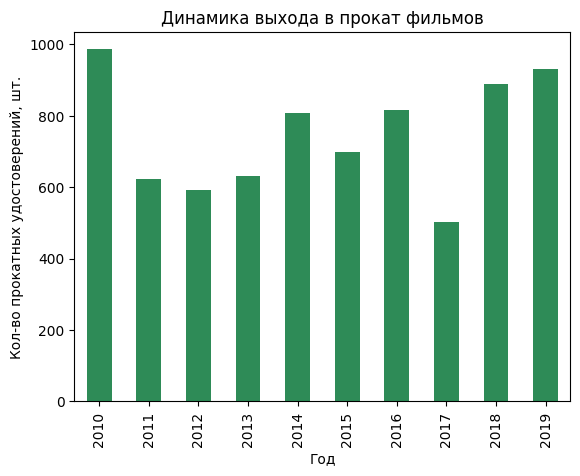

In [45]:
data_pu.plot(x='show_start_year', y='pu_number', kind='bar', legend=False, color='seagreen')
plt.title('Динамика выхода в прокат фильмов')
plt.ylabel('Кол-во прокатных удостоверений, шт.')
plt.xlabel('Год')
plt.show()

Согласно полученным данным, наименьше всего прокатных удостоврений было выдано в 2017 году, больше всего - 985 ед. - в 2010.

In [46]:
#посчитаем, какую долю составляют фильмы с заполненной информацией о прокате в кинотеатрах
#фильм с заполненной информацией по прокату в кинотеатрах = фильм с указанием суммы кассовых сборов
data_info_cinema = data.pivot_table(index='show_start_year', values=['box_office', 'title'], aggfunc='count').reset_index()
data_info_cinema['info_share'] = (data_info_cinema['box_office'] / data_info_cinema['title']) * 100
data_info_cinema

,show_start_year,box_office,title,info_share
0,2010,105,985,10.659898
1,2011,109,622,17.524116
2,2012,128,593,21.585160
3,2013,184,630,29.206349
4,2014,278,806,34.491315
5,2015,459,699,65.665236
6,2016,523,815,64.171779
7,2017,355,503,70.576541
8,2018,471,887,53.100338
9,2019,529,929,56.942949


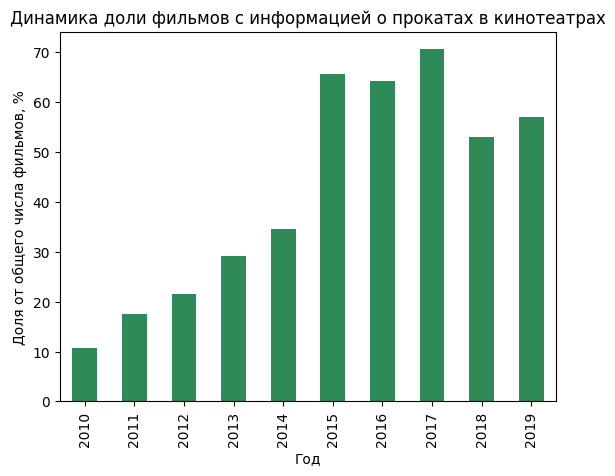

In [47]:
data_info_cinema.plot(x='show_start_year', y='info_share', kind='bar', legend=False, color='seagreen')
plt.title('Динамика доли фильмов с информацией о прокатах в кинотеатрах')
plt.ylabel('Доля от общего числа фильмов, %')
plt.xlabel('Год')
plt.show()

Согласно полученным данным, информация по прокату увеличивалась из года в год до 2017. С 2018 заметно снижение объема данных, однако, 2019 год показывает рост. Наиболее полно информация представлена в 2017 году, когда было выпущено наименьшее кол-во прокатов в год.

### Анализ сборов фильмов по годам

In [48]:
data_earn_cinema = data.pivot_table(index='show_start_year', values='box_office', aggfunc='sum').reset_index()
data_earn_cinema['box_office'] = data_earn_cinema['box_office'] / 1000000
data_earn_cinema

,show_start_year,box_office
0,2010,2.428654
1,2011,14.102765
2,2012,6.955423
3,2013,29.799706
4,2014,7434.717843
5,2015,38527.827199
6,2016,46742.316269
7,2017,48458.147254
8,2018,49251.991405
9,2019,48278.101953


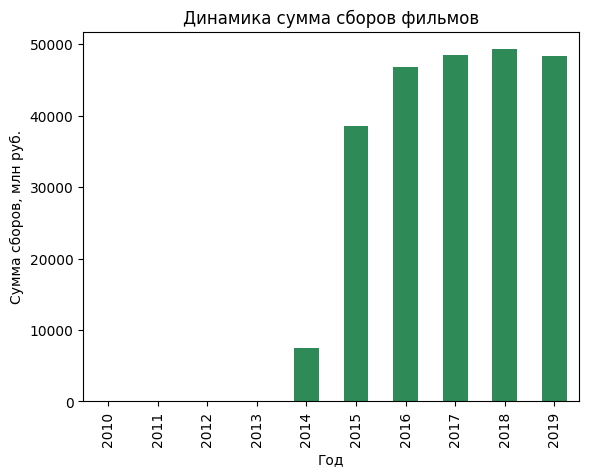

In [49]:
data_earn_cinema.plot(x='show_start_year', y='box_office', kind='bar', legend=False, color='seagreen')
plt.title('Динамика сумма сборов фильмов')
plt.ylabel('Сумма сборов, млн руб.')
plt.xlabel('Год')
plt.show()

Согласно полученным данным, с 2015 года виден существенный рост в кассовых сборах. Наиболее прибыльный год - 2018, наименее прибыльный - 2010. Однако нельзя с полной уверенностью сказать, что до 2015 года доходность фильмов была крайне низкая - согласно предыдущему графику, объем информации за 2010-2015 гг. был заметно ниже, что позволяет говорить о недостатке данных.  

In [50]:
#рассчитаем среднюю сумму сборов для каждого года
data.pivot_table(index='show_start_year', values='box_office', aggfunc={'mean', 'median'})

,mean,median
show_start_year,,
2010,2.313004e+04,1700.00
2011,1.293832e+05,3000.00
2012,5.433924e+04,5660.00
2013,1.619549e+05,3522.50
2014,2.674359e+07,18137.50
2015,8.393862e+07,4784781.50
2016,8.937345e+07,3776087.56
2017,1.365018e+08,9919415.00
2018,1.045690e+08,8751895.75


Анализируя полученные таблицы, можно увидеть, что в данных имеет место быть существенная разница в суммах сборов по годам. Медиана "отсекает" такие выбросы и показывает наиболее чаще встречающуюся картину. Стоит выделить 2012 год, в котором были наиболее "сбалансированные" данные - медиана и средняя по году достаточно близки.

Данная разница вызвана наличием "выбросов" в данных по кассовым сборам: определенные фильмы собирали доход многим выше остальных, что нормально - не всем фильмам быть "самыми кассовыми" за год.

### Анализ сборов в разрезе возрастного ограничения на фильмах

In [51]:
data_age = data.query('2015 <= show_start_year <= 2019')

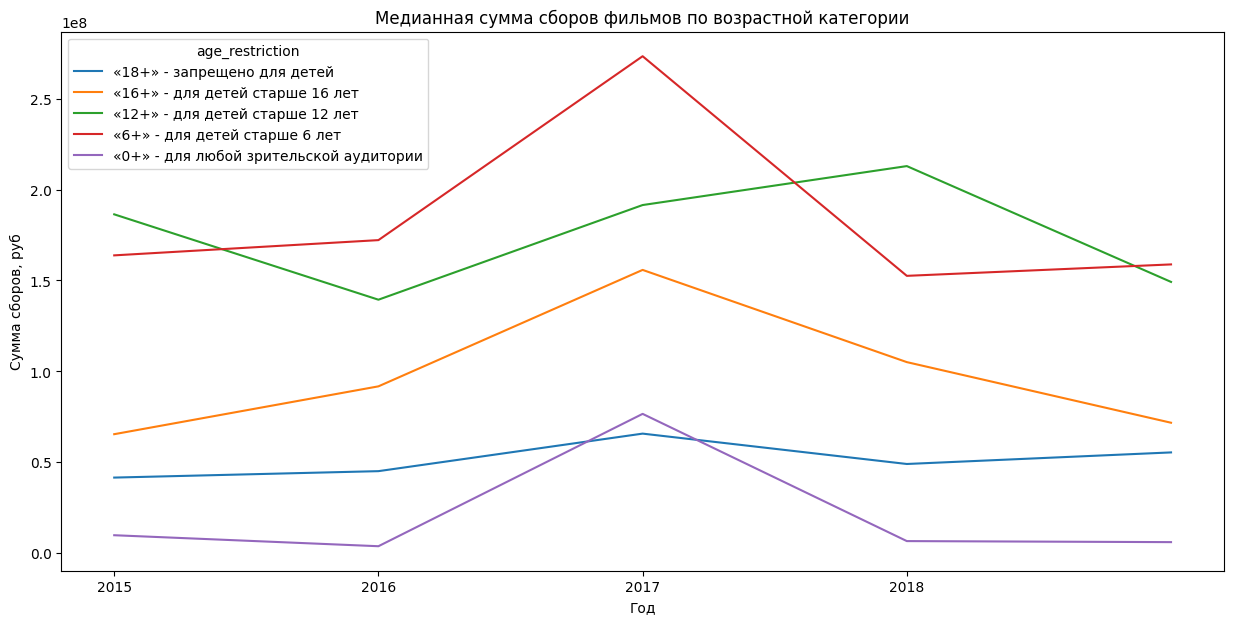

In [52]:
data_age_year = data_age.pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc='mean').reset_index()
data_age_year.plot(x='show_start_year', y=['«18+» - запрещено для детей', '«16+» - для детей старше 16 лет',\
                                           '«12+» - для детей старше 12 лет', '«6+» - для детей старше 6 лет',\
                                           '«0+» - для любой зрительской аудитории'], legend=True, figsize=(15,7))
plt.title('Медианная сумма сборов фильмов по возрастной категории')
plt.ylabel('Сумма сборов, руб')
plt.xlabel('Год')
plt.xticks(np.arange(min(data_age_year['show_start_year']), max(data_age_year['show_start_year']), 1))
plt.show()

In [53]:
data_age_year

age_restriction,show_start_year,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
0,2015,9.719348e+06,1.863821e+08,6.534303e+07,4.145306e+07,1.637945e+08
1,2016,3.664118e+06,1.393845e+08,9.168094e+07,4.499291e+07,1.721878e+08
2,2017,7.653298e+07,1.914982e+08,1.557883e+08,6.565643e+07,2.734326e+08
3,2018,6.489800e+06,2.129447e+08,1.050220e+08,4.893903e+07,1.525194e+08
4,2019,5.915356e+06,1.491788e+08,7.164842e+07,5.531036e+07,1.588118e+08


Анализируя полученную таблицу и график, можно сделать вывод, что возрастное ограничение фильма влияет на кассовый сбор. На первом месте по доходности оказываются фильмы 6+, причем лидирующая позиция держится на протяжении почти всего рассматриваемого периода. Наибольшая доходность связана, скорее всего, с целевой аудиторией фильмов 6+: это целые семьи. Поэтому доходность с одного просмотра будет больше. Фильмы, доступные любой зрительской категории, занимают последнее место в кассовых сборах. Это может быть связано с уменьшением кол-ва закупаемых фильмов, доступных широкой публике.

На данном этапе был проведен анализ фильмов в прокате, согласно которому можно сказать, что до 2015 года информаци было достаточно мало. С 2015 года растет выпуск фильмов в прокат и вместе с тем - прибыль. Хотя 2017 год показал, что небольшое количество выпускаемых фильмов не всегда означает низкую прибыль.

### Анализ окупаемости фильмов с государственной поддержкой

In [54]:
#рассмотрим, сколько выделяется средст гос. поддержки по годам
data['total_support'] = data['refundable_support'] + data['nonrefundable_support']
data_supp = data.query('total_support > 0')
data_supp_sum = data_supp.pivot_table(index='show_start_year', values='total_support', aggfunc='sum').reset_index()
data_supp_sum['total_support'] = data_supp_sum['total_support'] / 1000000
data_supp_sum

,show_start_year,total_support
0,2013,134.347945
1,2014,549.002299
2,2015,3227.241459
3,2016,3977.155482
4,2017,3098.971662
5,2018,3098.000000
6,2019,4724.000000


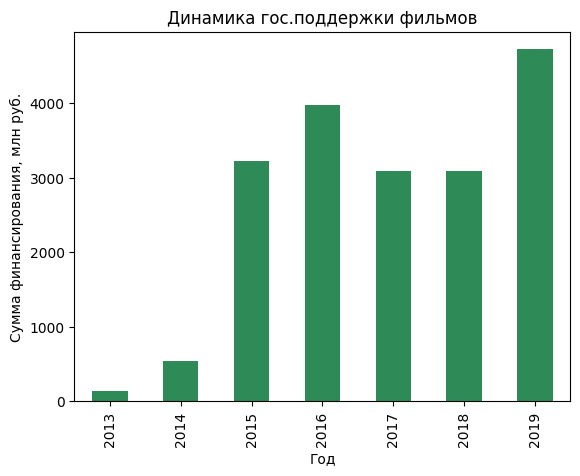

In [55]:
data_supp_sum.plot(x='show_start_year', y='total_support', kind='bar', legend=False, color='seagreen')
plt.title('Динамика гос.поддержки фильмов')
plt.ylabel('Сумма финансирования, млн руб.')
plt.xlabel('Год')
plt.show()

Информация о государственном финансировании фильмов появилась с 2013 года. К 2015 году объем средств существенно вырос - более, чем в 6 раз, по сравнению с предыдущим годом. Наиболее "затратным" был 2019 год, объем средств финансирования достиг около 4,5 млрд руб.

In [56]:
#рассмотрим маржу фильмов с гос.поддержкой по годам
data_supp['profit_share'] = data_supp['budget'] / data_supp['box_office']
data_supp_profit = data_supp.pivot_table(index='show_start_year', values='profit_share', aggfunc='mean').reset_index()
data_supp_profit

C:\Users\Ella\AppData\Local\Temp\ipykernel_15220\947673632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_supp['profit_share'] = data_supp['budget'] / data_supp['box_office']


,show_start_year,profit_share
0,2013,113.088203
1,2014,162.591151
2,2015,1127.201124
3,2016,371.746591
4,2017,31.958621
5,2018,45.776944
6,2019,25.037500


Согласно таблице, доля бюджета в среднем существенно выше кассового сбора фильмов. Наиболее "убыточным" стал 2015 год.

In [57]:
#рассмотрим рейтинги фильмов с гос.поддержкой
#категоризируем рейтинги:
def rate(row):
    '''
    Возвращает рейтинг фильма, используя правила:
    (значения — «0-2», «3-5», «6-8», «9+»)
    '''
    rate = row['ratings']
    
    if 0 <= rate <= 2:
        return '0-2'
        
    if 3 <= rate <= 5:
        return '3-5'
    
    if 6 <= rate <= 8:
        return '6-8'

    return '9+'

data_supp['rate_category'] = data_supp.apply(rate, axis=1)

C:\Users\Ella\AppData\Local\Temp\ipykernel_15220\2463749997.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_supp['rate_category'] = data_supp.apply(rate, axis=1)


In [58]:
data_supp_rate = data_supp.pivot_table(index='rate_category', values='total_support', aggfunc='count').reset_index()
data_supp_rate['total_support'] = data_supp_rate['total_support']
data_supp_rate

,rate_category,total_support
0,0-2,1
1,3-5,47
2,6-8,172
3,9+,95


Согласно полученной таблице, финансируемые государством фильмы показывают достаточно неплохие результаты: наибольший объем средств инвестирован в фильмы, получившие рейтинг от 6 до 8 баллов.

In [59]:
data_supp_age = data_supp.pivot_table(index='age_restriction', values='total_support', aggfunc='count').reset_index()
data_supp_age['total_support'] = data_supp_age['total_support']
data_supp_age

,age_restriction,total_support
0,«0+» - для любой зрительской аудитории,8
1,«12+» - для детей старше 12 лет,103
2,«16+» - для детей старше 16 лет,118
3,«18+» - запрещено для детей,27
4,«6+» - для детей старше 6 лет,59


Согласно полученной таблице, наибольшее финансирование получают фильмы для 16+ зрителей.

Анализируя фильмы с гос.поддержкой, можно сделать вывод, что объем средств увеливиается с каждым годом. Государство существенно поддерживает выпуск фильмов для зрителей 16+, и нельзя сказать, что их качество неутешительное - рейтинг составляет 6+ баллов.

## Выводы и рекомендации

Для анализа рынка российского кинопроката и определения текущих трендов были представлены данные, опубликованные на портале открытых данных Министерства культуры. Данные потребовали предобработки: объединение датафреймов, корректировка (там, где это возможно) пропусков, некорректных количественных значений, категориальных значений, а также доабвление новых столбцов.

По итогу анализа данных, можно сделать следующие выводы:
* С течением времени увеличивается информация о фильмах: кассовых сборах и объемах государственного финансирования.
* Наиболее доходные фильмы входят в категорию 6+.
* Количество выпускаемых в прокат фильмов в год не связано с доходностью в год.
* В целом, объемы гос.поддержки фильмов увеличиваются из года в год.
* С течением времени фильмы с гос.поддержкой выходят на бОльшую маржу, что также отражается на неплохом рейтинге таких фильмов: в основном, 6-8 баллов на КиноПоиске.
* Наиболее поддерживаются государством фильмы с рейтингом 16+ и 12+.

Для предотвращения потерь в данных необходимо более строго контролировать вводные данные и создать ограничения, при которых данные не будут прогружаться в базу.
Также необходимо более обобщенно учитывать некоторые категориальные значения: жанр, страна-производитель, рейтинг. Нельзя не сказать о необходимости единого оформления данных, напр. имена должны указываться только в одном формате: И.Фамилия; одни и те же фильмы при получении нескольких прокатных удостоверений должны получать единый формат названия, напр. _1, _2 и т.д. Это позволит более тщательно и быстро анализировать данные в случае необходимости. 